<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>Group 1</code><b>

<b>Group Members:</b>  

1. <code>Camilo Vargas_B00926233</code>
2. <code>Chinenye Ogbonnaya-Okafor_B00928009</code>
3. <code>Hang Yue_B00941127</code>
4. <code>Zekun Liu_B00717185</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> Food commodities historic prices</code></h4>
<h4> Link to the Dataset: <code>https://ca.finance.yahoo.com/commodities/</code> </h4>
<h4> Dataset Description: </h4>
<code> YahooFinance.com provides daily and free accessible historical data of commodities traded daily on the US capital markets. The datasets chosen for this project are 10 food commodities composed of: Corn, Oat Wheat, Rice, Soybean, Cocoa, Coffee, Sugar, Hogs, and Cattle. Each dataset (food commodity) contains features like the Open, High, Low, Close, Adj. Close prices, as well as the Volume traded each day. The period considered is almost 23 years of daily data for each of the 10 datasets, ranging from January 2000 to November 2023, aggregating a total of more than 50.000 samples. </code>


# 2. Task Information 

<h4> Task Goal: <code> Compare the performance of machine learning models in the prediction of food commodities prices. </code></h4>
<h4> Task Description: </h4>
    <code>Given the increases in food prices in the post-pandemic era and recent international conflicts, this project aims to find the best machine learning models by applying Linear Regression, Long Short-Term Memory (LSTM), and Extreme Gradient Boosting XGB Regressor to time series daily data of the last 23 years. These models will predict the Close price for each commodity based on features like Open, High, Low, Adj. Close prices, and Volume as well as seasonal features year, quarters or months. The model comparison will be based on metrics MAE, MSE, RMSE, RMSLE, and R-squared.</code>

# 3. Task Implementation: Coding

In [1]:
## Make sure to have installed the following packages in your machine before executing the code.

#!pip install yfinance 
#!pip install mplfinance 
#!pip install xgboost 
#!pip install keras 
#!pip install tensorflow 
#!pip install pandas_datareader #These are optional
# !pip install pycaret, markupsafe, jinja2 #These are optional


In [2]:
# Initialize the execution time of the entire code string:

from datetime import datetime
time_start = datetime.now()

In [3]:
# Import Libraries:

import pandas as pd
import numpy as np
import plotly as py
from plotly import tools
import plotly.graph_objs as go
import pandas_datareader as web
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import mean, std, sqrt
from pycaret.regression import *
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


### 3.1 Preprocessing 
#### 3.1.1 Download the Datasets:

In [49]:
# Set the historical dates range:

start_date = '2000-01-01' #Data available since year 2000
end_date = '2023-12-01' #Latest day available is yesterday

print('\033[1m' + 'Start date: ' + start_date + '\033[0m')
print('\033[1m' + 'End date: ' + end_date + '\033[0m')

Start date: 2000-01-01
End date: 2023-12-01


In [5]:
# Example dataset of Corn historical prices: ZC=F, in US Dollars.

Commodity = 'ZC' # The commodity symbol

# Retrieve market data of commodity symbol
data = yf.download(Commodity+'=F', start=start_date, end=end_date)
data #.info()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523
...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371


In [6]:
# Retrieve market data of 10 food commodity symbols:

Commodities=['ZC', 'ZO', 'KE', 'ZR', 'ZS', 'CC', 'KC', 'SB', 'HE', 'LE']
commodities_names = ['Corn-ZC', 'Oat-ZO', 'Wheat-KE', 'Rice-ZR', 'Soybean-ZS',
                  'Cocoa-CC', 'Coffee-KC', 'Sugar-SB', 'Hogs-HE', 'Cattle-LE']

dataframes = [] # Empty list to store the 10 downloaded datasets

for i in Commodities:
    data_F = yf.download(i+'=F', start=start_date, end=end_date)
    dataframes.append(data_F)

# Print the 10 downloaded datasets: 
for commodity, df in zip(commodities_names, dataframes):
    print('\n \033[1m' + commodity + '\033[0m')
    print(df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 Corn-ZC
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2020-01-02  387.75  392.00  387.25  391.50     391.50  103987
2020-01-03  391.50  392.00  385.50  386.50     386.50  125931
2020-01-06  386.25  387.75  382.75  384.75     384.7

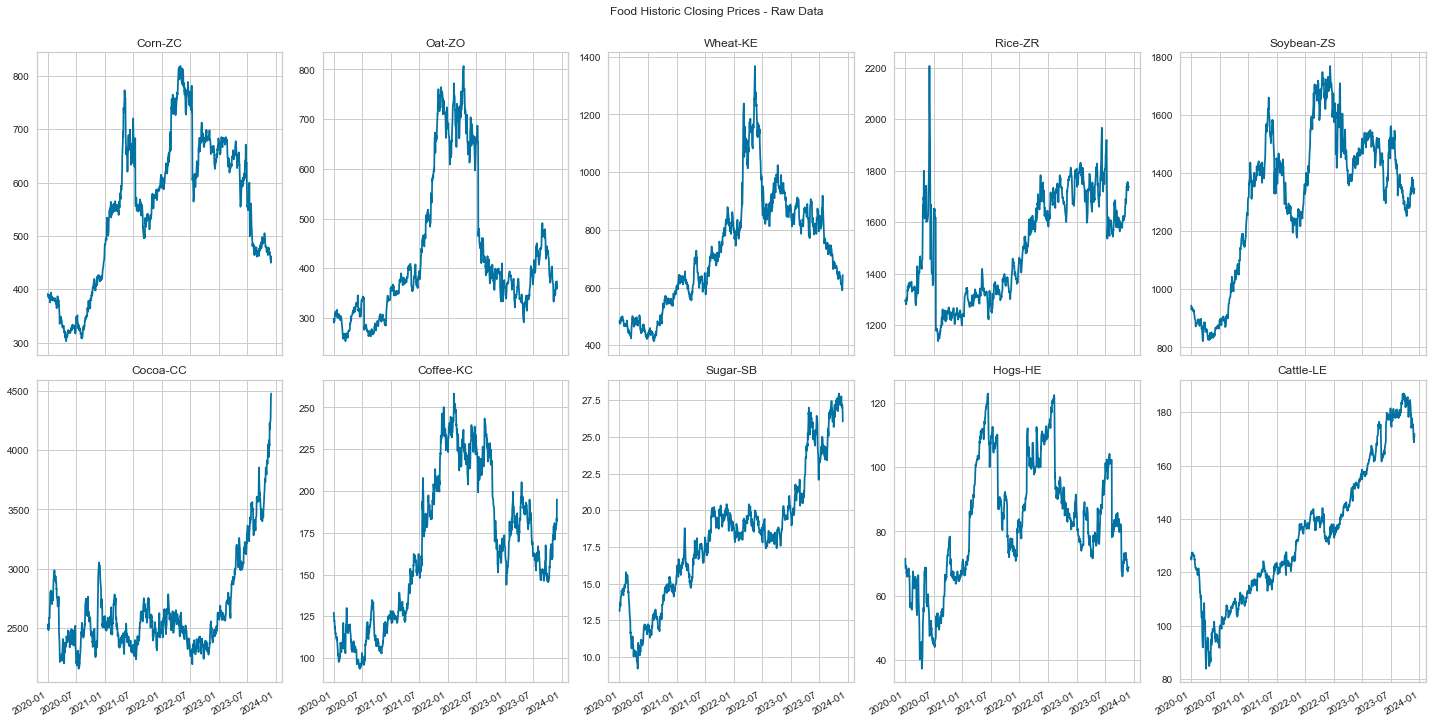

In [7]:
# Visualize raw data of the 10 food commodities historical prices:

fig, axes = plt.subplots(2, 5, figsize=(20, 10)) #subplots arranged in a 2x5 grid
plt.suptitle("Food Historic Closing Prices - Raw Data").set_y(1)

# Add data to the subplots
for df, ax, commodity, name in zip(dataframes, axes.flatten(), Commodities, commodities_names):
    ax.plot(df['Close'])
    ax.set_title(name)
    plt.gcf().autofmt_xdate()  
    ax.grid(True)

plt.tight_layout()

#### 3.1.2 Data cleaning:

In [8]:
# Check for null values:

print('\n \033[1m' + 'Null values report:' + '\033[0m \n')

for commodity, df in zip(commodities_names, dataframes):
    print('\n \033[1m' + commodity + ':\033[0m')
    print(df.isna().sum())

print('\n \033[1m' + 'The report shows no missing values in any dataframe' + '\033[0m')


 Null values report: 


 Corn-ZC:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Oat-ZO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Wheat-KE:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Rice-ZR:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Soybean-ZS:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Cocoa-CC:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Coffee-KC:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Sugar-SB:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 Hogs-HE:
Open         0
High         0
Low          0
C

In [9]:
# Check for duplicate values:
# Since there could be daily data with the same prices, i.e., no fluctuations between trading days
## so there is no need to drop the duplicate rows as they imply the prices were stable.

print('\n \033[1m' + 'Duplicate values report:' + '\033[0m \n')

for commodity, df in zip(commodities_names, dataframes):
    print('\n \033[1m' + commodity + ':\033[0m')
    duplicates = df[df.duplicated(keep=False)]  
    if duplicates.empty:
        print("This DataFrame does not have duplicates.")
    else:
        print(duplicates)


 Duplicate values report: 


 Corn-ZC:
This DataFrame does not have duplicates.

 Oat-ZO:
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2020-03-10  268.50  268.50  268.50  268.50     268.50       7
2020-03-12  268.50  268.50  268.50  268.50     268.50       7
2020-07-10  339.25  339.25  339.25  339.25     339.25       0
2022-12-05  339.25  339.25  339.25  339.25     339.25       0
2022-12-12  361.25  361.25  361.25  361.25     361.25       0
2022-12-13  361.25  361.25  361.25  361.25     361.25       0
2023-07-12  394.75  394.75  394.75  394.75     394.75      12
2023-07-13  394.75  394.75  394.75  394.75     394.75      12

 Wheat-KE:
This DataFrame does not have duplicates.

 Rice-ZR:
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2020-05-04  1620.0  1620.0  1620.0  1620.0     1620.0       0
2022-01-12  1406.5  1406.5  1406.5  140

In [10]:
# Check for outliers:
# Consider outliers to closing prices with a z_score > 3 or < -3 standard deviations
# The Z-score is a measure of how many standard deviations a data point is from the mean.

print('\n \033[1m' + 'Outliers report:' + '\033[0m \n')

for commodity, df in zip(commodities_names, dataframes):
    print('\n \033[1m' + commodity + ':\033[0m')
    df['z_score'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()
    outliers = df[np.abs(df['z_score']) > 3]
    if outliers.empty:
        print("This DataFrame does not have outliers.")
    else:
        print(outliers)

# Function to remove outliers:
# Where the z-score is greater than the absolute value > 3, it is replaced to the previous value
def replace_outlier(df):
    for row in range(0,len(df)):
        df.drop(['z_score'], axis=1, inplace=True, errors='ignore')
        df['z_score'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()
        df['Close'] = np.where((df['z_score'] > 3), df['Close'].shift(1), df['Close'])



 Outliers report: 


 Corn-ZC:
This DataFrame does not have outliers.

 Oat-ZO:
This DataFrame does not have outliers.

 Wheat-KE:
               Open     High     Low    Close  Adj Close  Volume   z_score
Date                                                                      
2022-05-16  1326.25  1352.00  1325.0  1352.00    1352.00   14816  3.120870
2022-05-17  1370.50  1379.25  1298.5  1367.75    1367.75   22301  3.199824

 Rice-ZR:
              Open    High     Low   Close  Adj Close  Volume   z_score
Date                                                                   
2020-06-04  2067.5  2206.5  2063.0  2206.5     2206.5    1446  3.477842

 Soybean-ZS:
This DataFrame does not have outliers.

 Cocoa-CC:
              Open    High     Low   Close  Adj Close  Volume   z_score
Date                                                                   
2023-11-03  3859.0  3906.0  3823.0  3898.0     3898.0   25573  3.057561
2023-11-06  3900.0  3954.0  3865.0  3914.0     3914.0   4590

In [11]:
# Define Feature Creation functions:

# Add new column with the Close percentual change between days
def add_pct_change(df):
    if any(col in df.columns for col in set(['Close_Change_Pct', 'Close_Change_Pct_x', 'Close_Change_Pct_y'])):
        df.drop(['Close_Change_Pct'], axis=1, inplace=True, errors='ignore')
        df['Close_Change_Pct'] = df['Close'].pct_change()
    else:
        df['Close_Change_Pct'] = df['Close'].pct_change()
    return df.sort_values(by='Close_Change_Pct', ascending=True).head(10) # Sort the dates with the largest change pct

# Normalize the data and Create time series features per period:
def Feature_Creation(df):
    df.drop(['CloseNor','DayOfWeek','Month','Quarter','Year','Prediction'], axis=1, inplace=True, errors='ignore')
    df['CloseNor'] = MinMaxScaler().fit_transform(df.filter(['Close']).values) # Normalize the close price
    df['DayOfWeek'] = df.index.dayofweek
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    return df

In [12]:
# Check for drastic price falls:
# Where the Close change pct changed <= -50% compared to the previous day, it is considered a drastic fall  

print('\n \033[1m' + 'Drastic price falls report:' + '\033[0m \n')

for commodity, df in zip(commodities_names, dataframes):
    add_pct_change(df)
    print('\n \033[1m' + commodity + ':\033[0m')
    falls = df[df['Close_Change_Pct'] <= -0.5]
    if falls.empty:
        print("This DataFrame does not have drastic price falls.")
    else:
        print(falls)

# Define function to replace the fall price to the previous value:
def replace_fall(df):
    for row in range(0,len(df)):
        df['Close'] = np.where((df['Close_Change_Pct'] <= -0.5), df['Close'].shift(1), df['Close'])



 Drastic price falls report: 


 Corn-ZC:
This DataFrame does not have drastic price falls.

 Oat-ZO:
This DataFrame does not have drastic price falls.

 Wheat-KE:
This DataFrame does not have drastic price falls.

 Rice-ZR:
This DataFrame does not have drastic price falls.

 Soybean-ZS:
This DataFrame does not have drastic price falls.

 Cocoa-CC:
This DataFrame does not have drastic price falls.

 Coffee-KC:
This DataFrame does not have drastic price falls.

 Sugar-SB:
This DataFrame does not have drastic price falls.

 Hogs-HE:
This DataFrame does not have drastic price falls.

 Cattle-LE:
This DataFrame does not have drastic price falls.


In [13]:
# Apply cleaning functions to the 10 commodities dataframes

for df in dataframes:
    add_pct_change(df)
    replace_outlier(df)
    replace_fall(df)
    Feature_Creation(df)

dataframes[3] # return example df Rice after applying cleaning functions

,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year
Date,,,,,,,,,,,,,
2020-01-02,1293.5,1293.5,1293.5,1293.5,1293.5,62,NaN,-1.059248,0.168845,3,1,1,2020
2020-01-03,1289.5,1299.5,1289.5,1299.5,1299.5,1,0.004639,-1.029372,0.175381,4,1,1,2020
2020-01-06,1286.5,1286.5,1281.5,1281.5,1281.5,2,-0.013851,-1.118999,0.155773,0,1,1,2020
2020-01-07,1282.0,1283.5,1282.0,1283.5,1283.5,1,0.001561,-1.109040,0.157952,1,1,1,2020
2020-01-08,1283.5,1283.5,1283.5,1283.5,1283.5,22,0.000000,-1.109040,0.157952,2,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,1721.0,1767.5,1716.5,1756.5,1756.5,617,0.015318,1.246141,0.673203,4,11,4,2023
2023-11-27,1751.0,1765.0,1722.0,1724.0,1724.0,728,-0.018503,1.084316,0.637800,0,11,4,2023
2023-11-28,1726.0,1745.0,1717.0,1738.0,1738.0,783,0.008121,1.154025,0.653050,1,11,4,2023


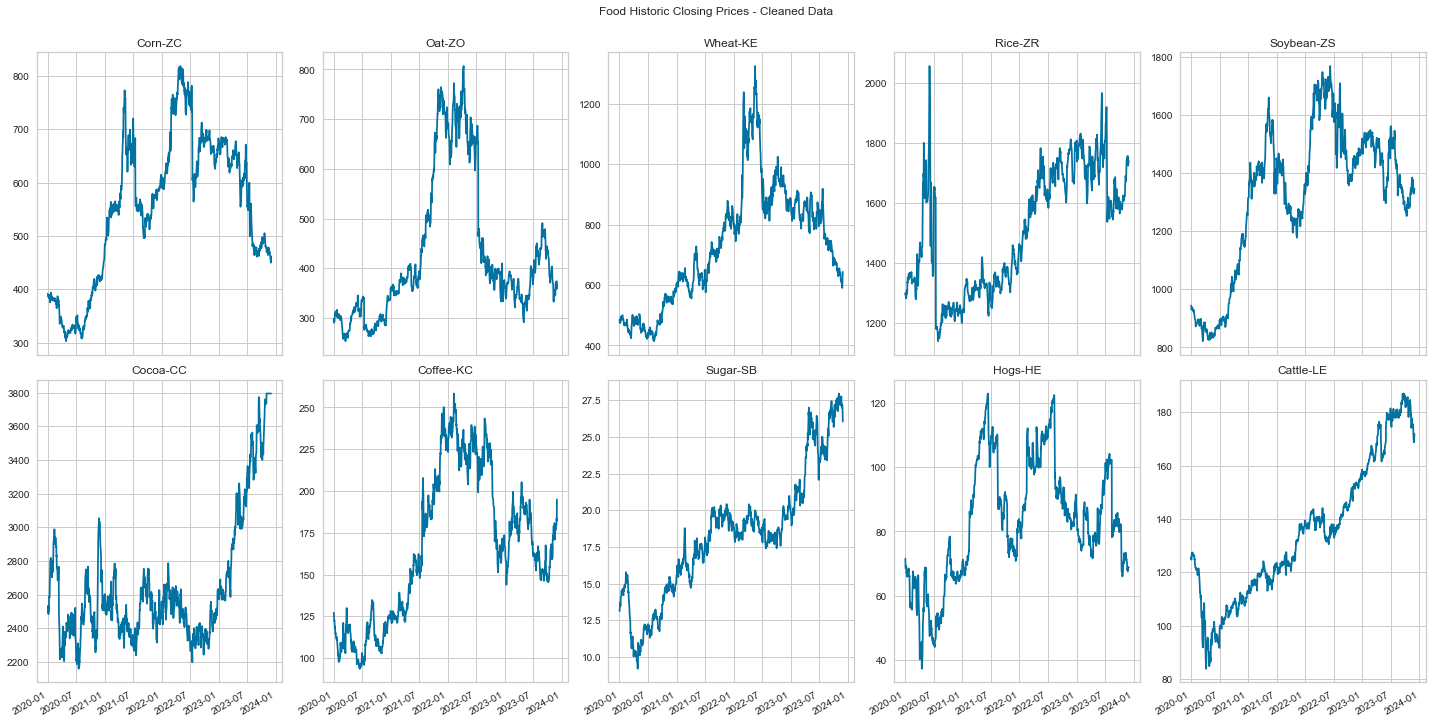

In [14]:
# Visualize Cleaned Data

# Create a figure with 10 subplots arranged in a 5x2 grid
fig, axes = plt.subplots(2,5, figsize=(20,10))
plt.suptitle("Food Historic Closing Prices - Cleaned Data").set_y(1)

for df, ax, commodity, name in zip(dataframes, axes.flatten(), Commodities, commodities_names):
    ax.plot(df['Close'])
    plt.gcf().autofmt_xdate()
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(name)
    ax.grid(True)
plt.tight_layout()

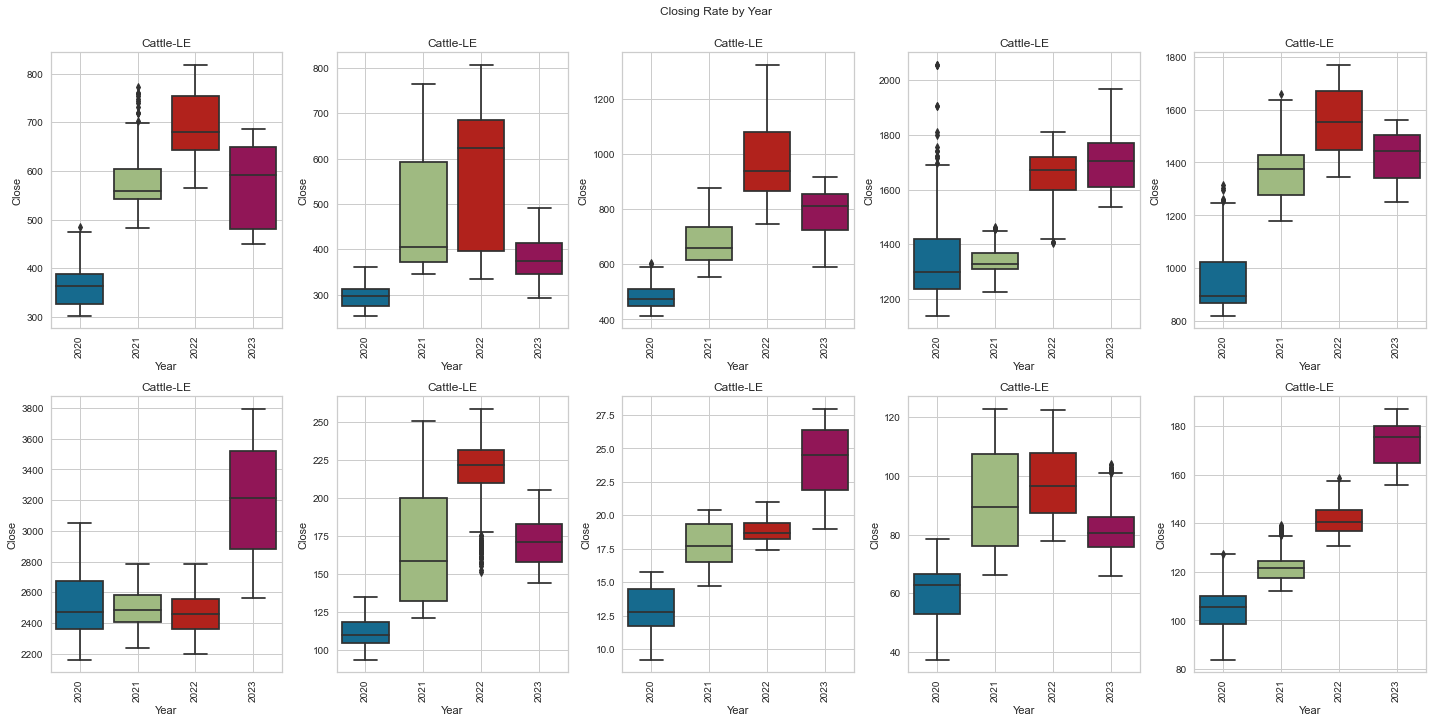

In [15]:
# Boxplots across Year and Target Relationship 

fig, axes = plt.subplots(2,5, figsize=(20,10))
plt.suptitle("Closing Rate by Year").set_y(1)

for df, ax, commodity, commodity_name in zip(dataframes, axes.flatten(), Commodities, commodities_names):
    sns.boxplot(y='Close', x= 'Year', data=df, ax=ax, orient='v').set_title(name)#
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True)
plt.tight_layout()


### 3.2 Model development and training 
Considering a single commodity (e.g., `Corn-ZC`) to develop and train the models, later in section 3.3 Model evaluation each model will be deployed and evaluated on the 10 commodities.

#### 3.2.1 Model: Linear Regression (LR)

In [16]:
# Retrieve Example dataset of Corn hisotical data for its commodity symbol 'ZC'

Commodity = 'ZC'
CommodityName = 'Corn-ZC'
data = yf.download(Commodity+'=F', start=start_date, end=end_date)

# Apply cleaning functions:
add_pct_change(data)
replace_outlier(data)
replace_fall(data)
Feature_Creation(data)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year
Date,,,,,,,,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987,NaN,-1.176308,0.172163,3,1,1,2020
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931,-0.012771,-1.212948,0.162464,4,1,1,2020
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130,-0.004528,-1.225772,0.159069,0,1,1,2020
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541,-0.000650,-1.227604,0.158584,1,1,1,2020
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523,-0.000650,-1.229436,0.158099,2,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555,-0.011733,-0.650531,0.311348,4,11,4,2023
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939,-0.016730,-0.707322,0.296314,0,11,4,2023
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371,-0.008782,-0.736634,0.288555,1,11,4,2023


In [17]:
# Split the data into training and testing sets

data['date_ordinal'] = data.index.map(pd.Timestamp.toordinal) #converts the index (date) to ordinal numbers.
# This is done because the `LinearRegression` model can’t handle `datetime` values.

split_date = int(len(data) * 0.8) # Train in 80% of first dates

# Split training and test datasets
X_train = data[['date_ordinal']].iloc[ :split_date]
y_train = data['Close'].iloc[ :split_date]
X_test = data[['date_ordinal']].iloc[split_date: ]
y_test = data['Close'].iloc[split_date: ]

# Split dataset including all features for a multiple linear regression:
# If all the features are considered then the Open feature explains all the variation Close price
# X_train = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[ :split_date]
# y_train = data[['Close']].iloc[ :split_date]
# X_test = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[split_date: ]
# y_test = data[['Close']].iloc[split_date: ]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape} \n')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (788, 1)
y_train shape: (788,) 

X_test shape: (198, 1)
y_test shape: (198,)


In [18]:
# Create a LinearRegression model

LR_model = LinearRegression()

# Fit the model to the training data
LR_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LR_model.predict(X_test)
# len(y_pred)

# Create a new column to add the predicted values
data['pred'] = np.nan
data.loc[split_date: ,'pred'] = y_pred
data


,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year,date_ordinal,pred
Date,,,,,,,,,,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987,NaN,-1.176308,0.172163,3,1,1,2020,737426,NaN
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931,-0.012771,-1.212948,0.162464,4,1,1,2020,737427,NaN
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130,-0.004528,-1.225772,0.159069,0,1,1,2020,737430,NaN
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541,-0.000650,-1.227604,0.158584,1,1,1,2020,737431,NaN
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523,-0.000650,-1.229436,0.158099,2,1,1,2020,737432,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555,-0.011733,-0.650531,0.311348,4,11,4,2023,738848,877.299602
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939,-0.016730,-0.707322,0.296314,0,11,4,2023,738851,878.448387
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371,-0.008782,-0.736634,0.288555,1,11,4,2023,738852,878.831315


In [19]:
# Calculate the evaluation metrics on the test dataset:

MAE = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred) # Mean Squared Error
RMSE = sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred)) # Root Mean Squared Logarithmic Error
R2 = r2_score(y_test, y_pred) # R-Squared

# Store metrics in these lists:
metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
metrics_values = [MAE, MSE, RMSE, RMSLE, R2]

for metric, value in zip(metrics_names, metrics_values):
    print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')

 Corn-ZC, MAE: 269.71 
 Corn-ZC, MSE: 84022.18 
 Corn-ZC, RMSE: 289.87 
 Corn-ZC, RMSLE: 0.44 
 Corn-ZC, R2: -13.36 


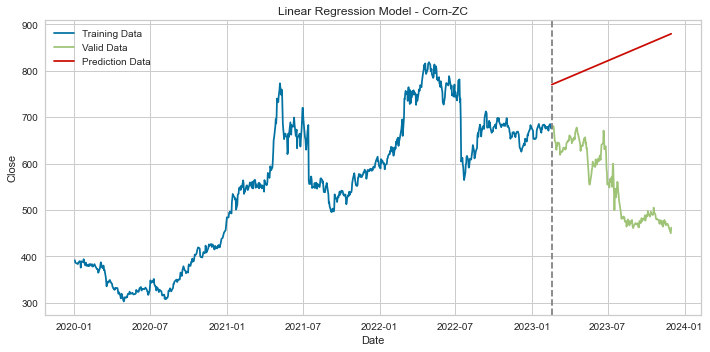

In [20]:
# Visualize the training data and predictions

plt.figure(figsize=(10, 5))
plt.title(f'Linear Regression Model - {CommodityName}')
plt.plot(y_train, label='Training Data')# Plot the training data
plt.plot(y_test, label='Valid Data') # Plot the testing data
plt.plot(data['pred'], label='Prediction Data')# Plot the predictions
plt.axvline(data.index[split_date], color='grey', ls='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.tight_layout()

#### 3.2.2 Model: Long Short-Term Memory (LSTM)

In [21]:
# Retrieve Example dataset of Corn hisotical data for its commodity symbol 'ZC'

Commodity = 'ZC'
CommodityName = 'Corn-ZC'
data = yf.download(Commodity+'=F', start=start_date, end=end_date)

# Apply cleaning functions:
add_pct_change(data)
replace_outlier(data)
replace_fall(data)
Feature_Creation(data)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year
Date,,,,,,,,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987,NaN,-1.176308,0.172163,3,1,1,2020
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931,-0.012771,-1.212948,0.162464,4,1,1,2020
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130,-0.004528,-1.225772,0.159069,0,1,1,2020
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541,-0.000650,-1.227604,0.158584,1,1,1,2020
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523,-0.000650,-1.229436,0.158099,2,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555,-0.011733,-0.650531,0.311348,4,11,4,2023
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939,-0.016730,-0.707322,0.296314,0,11,4,2023
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371,-0.008782,-0.736634,0.288555,1,11,4,2023


In [22]:
# Training Dataset

split_date = int(len(data) * 0.8) # Train in 80% of first dates

train = np.array(data.CloseNor.iloc[ :split_date])

X_train = []
y_train = []

for i in range(60, split_date):
    X_train.append(train[i-60:i])
    y_train.append(train[i])

X_train, y_train= np.array(X_train), np.array(y_train) # convert the data into array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshape the data

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (728, 60, 1)
y_train shape: (728,)


In [23]:
# Testing Dataset

test = np.array(data.CloseNor.iloc[split_date: ]) # Test after split date

X_test = []
y_test = data.Close.iloc[split_date+60: ] # normal values from original data

for i in range(60, len(test)):
    X_test.append(test[i-60:i])

X_test = np.array(X_test) # convert the data into array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape the data

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (138, 60, 1)
y_test shape: (138,)


In [24]:
# Create model LSTM

seq = Sequential() # Initializing the RNN
seq.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # Adding the first LSTM layer
seq.add(LSTM(50, return_sequences=False)) # Adding the Second LSTM layer
seq.add(Dense(25))
seq.add(Dense(1))

seq.compile(optimizer='adam', loss='mean_squared_error')# Compile the model

# Traing the model. Set the epochs=10 (if epochs=100 takes too long)
seq.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
23/23 [==============================] - 10s 137ms/step - loss: 0.0581
Epoch 2/10
23/23 [==============================] - 3s 135ms/step - loss: 0.0060
Epoch 3/10
23/23 [==============================] - 3s 137ms/step - loss: 0.0033
Epoch 4/10
23/23 [==============================] - 3s 137ms/step - loss: 0.0030
Epoch 5/10
23/23 [==============================] - 3s 138ms/step - loss: 0.0029
Epoch 6/10
23/23 [==============================] - 3s 137ms/step - loss: 0.0028
Epoch 7/10
23/23 [==============================] - 3s 133ms/step - loss: 0.0026
Epoch 8/10
23/23 [==============================] - 3s 137ms/step - loss: 0.0025
Epoch 9/10
23/23 [==============================] - 3s 133ms/step - loss: 0.0023
Epoch 10/10
23/23 [==============================] - 3s 135ms/step - loss: 0.0022


In [25]:
# Get model predicted values

scaler = MinMaxScaler()
scaler.fit(data.filter(['Close']).values)

y_pred = seq.predict(X_test)
y_pred = scaler.inverse_transform(y_pred) # "inverse scaled values to original values"

5/5 [==============================] - 2s 44ms/step


In [26]:
# Calculate the evaluation metrics on the test dataset:

MAE = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred) # Mean Squared Error
RMSE = sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred)) # Root Mean Squared Logarithmic Error
R2 = r2_score(y_test, y_pred) # R-Squared

# Store metrics in these lists:
metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
metrics_values = [MAE, MSE, RMSE, RMSLE, R2]

for metric, value in zip(metrics_names, metrics_values):
    print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')

 Corn-ZC, MAE: 17.15 
 Corn-ZC, MSE: 608.92 
 Corn-ZC, RMSE: 24.68 
 Corn-ZC, RMSLE: 0.04 
 Corn-ZC, R2: 0.81 


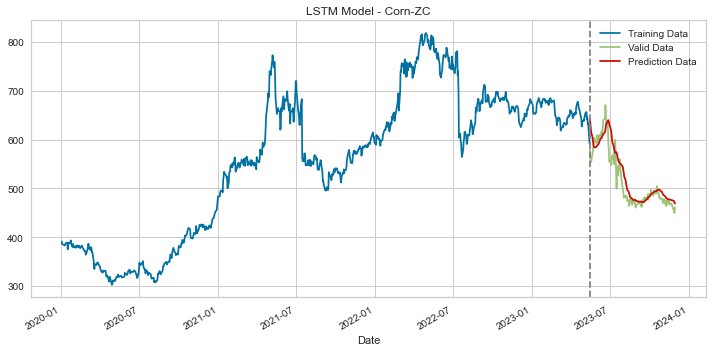

In [27]:
# Split Close prices into train and valid df

train_df = pd.DataFrame(data.Close.iloc[ :split_date+60]) 
valid_df = pd.DataFrame(data.Close.iloc[split_date+60: ]) 
valid_df['Prediction'] = y_pred # Add Prediction column with the inverse normalized values

# Plot the datasets 

fig, ax1 = plt.subplots(figsize=(10,5))
train_df.plot(ax=ax1, label='Training Data', title=f'LSTM Model - {CommodityName}')
valid_df.plot(ax=ax1, label=['Valid Data','Prediction Data']).grid(True)
ax1.axvline(data.index[split_date+60], color='grey', ls='--')
ax1.legend(['Training Data', 'Valid Data','Prediction Data'])
plt.tight_layout()


In [28]:
# Show valid and predicted values
valid_df #.shape

,Close,Prediction
Date,,
2023-05-16,581.25,640.124939
2023-05-17,561.50,633.673828
2023-05-18,555.25,624.929871
2023-05-19,554.50,614.993652
2023-05-22,571.00,604.932251
...,...,...
2023-11-24,463.25,475.738495
2023-11-27,455.50,474.949371
2023-11-28,451.50,473.500244


#### 3.2.3 Model: Extreme Gradient Boosting XGB Regressor

In [29]:
# Retrieve Example dataset of Corn hisotical data for its commodity symbol 'ZC'

Commodity = 'ZC'
CommodityName = 'Corn-ZC'
data = yf.download(Commodity+'=F', start=start_date, end=end_date)

# Apply cleaning functions:
add_pct_change(data)
replace_outlier(data)
replace_fall(data)
Feature_Creation(data)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year
Date,,,,,,,,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987,NaN,-1.176308,0.172163,3,1,1,2020
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931,-0.012771,-1.212948,0.162464,4,1,1,2020
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130,-0.004528,-1.225772,0.159069,0,1,1,2020
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541,-0.000650,-1.227604,0.158584,1,1,1,2020
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523,-0.000650,-1.229436,0.158099,2,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555,-0.011733,-0.650531,0.311348,4,11,4,2023
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939,-0.016730,-0.707322,0.296314,0,11,4,2023
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371,-0.008782,-0.736634,0.288555,1,11,4,2023


In [30]:
# Training Dataset

split_date = int(len(data) * 0.8) # Train in 80% of first dates

train_df = pd.DataFrame(data.Close.iloc[ :split_date])
test_df = pd.DataFrame(data.Close.iloc[split_date: ]) # Test in 20% after split

print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

# Split training and test datasets
X_train = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[ :split_date]
y_train = data[['Close']].iloc[ :split_date]

X_test = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[split_date: ]
y_test = data[['Close']].iloc[split_date: ]

Train shape: (788, 1)
Test shape: (198, 1)


In [31]:
# Create model XGB Regressor

xgbreg = xgb.XGBRegressor(n_estimators = 1000, colsample_bytree = 0.3, max_depth = 5, alpha = 10,
   early_stopping_rounds =50, learning_rate = 0.1)

# Fit the model to the training data
xgbreg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:517.10655	validation_1-rmse:505.57321
[88]	validation_0-rmse:4.60631	validation_1-rmse:14.43845


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

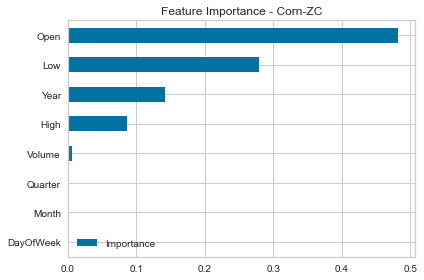

In [32]:
# Feature Importance shows the feature that contribute the most to forecast the Close price
Importance = pd.DataFrame(xgbreg.feature_importances_, index=xgbreg.feature_names_in_, columns=['Importance'])
Importance.sort_values('Importance').plot(kind='barh', title=f'Feature Importance - {CommodityName}')
plt.tight_layout()

In [33]:
# Forecast on Test set

test_df['Prediction'] = xgbreg.predict(X_test) # Add the predictions in a new column

# merge the predictions with the initial df
if any(col in data.columns for col in set(['Prediction', 'Prediction_x', 'Prediction_y'])):
    data.drop(['Prediction','Prediction_x','Prediction_y'], axis=1, inplace=True, errors='ignore')
    data = data.merge(test_df['Prediction'], how='left', left_index=True, right_index=True)
else:
    data = data.merge(test_df['Prediction'], how='left', left_index=True, right_index=True)

data


,Open,High,Low,Close,Adj Close,Volume,Close_Change_Pct,z_score,CloseNor,DayOfWeek,Month,Quarter,Year,Prediction
Date,,,,,,,,,,,,,,
2020-01-02,387.75,392.00,387.25,391.50,391.50,103987,NaN,-1.176308,0.172163,3,1,1,2020,NaN
2020-01-03,391.50,392.00,385.50,386.50,386.50,125931,-0.012771,-1.212948,0.162464,4,1,1,2020,NaN
2020-01-06,386.25,387.75,382.75,384.75,384.75,112130,-0.004528,-1.225772,0.159069,0,1,1,2020,NaN
2020-01-07,385.00,385.75,383.50,384.50,384.50,93541,-0.000650,-1.227604,0.158584,1,1,1,2020,NaN
2020-01-08,384.00,385.50,382.25,384.25,384.25,135523,-0.000650,-1.229436,0.158099,2,1,1,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,468.00,470.50,462.50,463.25,463.25,113555,-0.011733,-0.650531,0.311348,4,11,4,2023,478.840607
2023-11-27,464.25,465.75,453.75,455.50,455.50,180939,-0.016730,-0.707322,0.296314,0,11,4,2023,475.887054
2023-11-28,455.50,456.75,450.25,451.50,451.50,181371,-0.008782,-0.736634,0.288555,1,11,4,2023,474.220062


In [34]:
# Calculate the evaluation metrics on the test dataset:

MAE = mean_absolute_error(test_df['Close'], test_df['Prediction']) # Mean Absolute Error
MSE = mean_squared_error(test_df['Close'], test_df['Prediction']) # Mean Squared Error
RMSE = sqrt(mean_squared_error(test_df['Close'], test_df['Prediction'])) # Root Mean Squared Error
RMSLE = np.sqrt(mean_squared_log_error(test_df['Close'], test_df['Prediction'])) # Root Mean Squared Logarithmic Error
R2 = r2_score(test_df['Close'], test_df['Prediction']) # R-Squared

# Store metrics in these lists:
metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
metrics_values = [MAE, MSE, RMSE, RMSLE, R2]

for metric, value in zip(metrics_names, metrics_values):
    print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')

 Corn-ZC, MAE: 8.63 
 Corn-ZC, MSE: 132.69 
 Corn-ZC, RMSE: 11.52 
 Corn-ZC, RMSLE: 0.02 
 Corn-ZC, R2: 0.98 


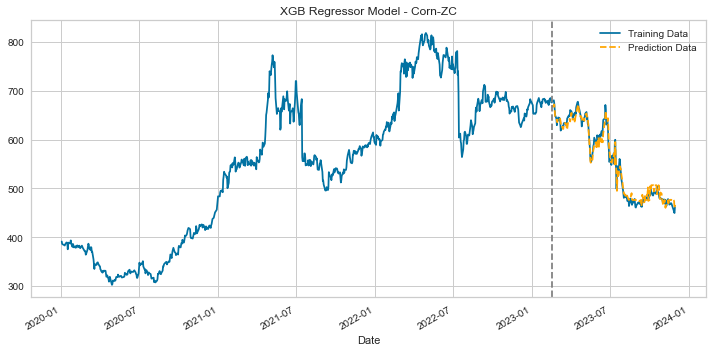

In [35]:
# Visualize Training and Predictions 

fig, ax1 = plt.subplots(figsize=(10,5))
data[['Close']].plot(ax=ax1, title=f'XGB Regressor Model - {CommodityName}')
data[['Prediction']].plot(ax=ax1, style='--', color='orange').grid(True)
ax1.axvline(data.index[split_date], color='grey', ls='--')
ax1.legend(['Training Data', 'Prediction Data'])
plt.tight_layout()

### 3.3 Model evaluation

#### 3.3.1 Model evaluation: Linear Regression (LR)
Deploy and evaluate the LR model across the 10 commodities.

In [36]:
# Define Linear Regression functions:

def LR_Model(data):
    # Apply cleaning functions:
    add_pct_change(data)
    replace_outlier(data)
    replace_fall(data)
    Feature_Creation(data)

    # Split the data into training and testing sets
    data['date_ordinal'] = data.index.map(pd.Timestamp.toordinal) #converts the index (date) to ordinal numbers.
    split_date = int(len(data) * 0.8) # Train in 80% of first dates
    X_train = data[['date_ordinal']].iloc[ :split_date]
    y_train = data['Close'].iloc[ :split_date]
    X_test = data[['date_ordinal']].iloc[split_date: ]
    y_test = data['Close'].iloc[split_date: ]

    # Create a LinearRegression model
    LR_model = LinearRegression()
    LR_model.fit(X_train, y_train)# Fit the model to the training data
    y_pred = LR_model.predict(X_test)# Make predictions on the test data

    # Create a new column to add the predicted values
    data['pred'] = np.nan
    data.loc[split_date: ,'pred'] = y_pred

    # Calculate the evaluation metrics on the test dataset:
    MAE = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
    MSE = mean_squared_error(y_test, y_pred) # Mean Squared Error
    RMSE = sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred)) # Root Mean Squared Logarithmic Error
    R2 = r2_score(y_test, y_pred) # R-Squared
    # Store metrics in these lists:
    metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
    metrics_values = [MAE, MSE, RMSE, RMSLE, R2]
    for metric, value in zip(metrics_names, metrics_values):
        print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')
    results_LR_Model.append(metrics_values)# Store the results from each dataframes in a empty list
    print()

    # Visualize the training data and predictions
    plt.figure(figsize=(10, 5))
    plt.title(f'Linear Regression Model - {CommodityName}')
    plt.plot(y_train, label='Training Data')# Plot the training data
    plt.plot(y_test, label='Valid Data') # Plot the testing data
    plt.plot(data['pred'], label='Prediction Data')# Plot the predictions
    plt.axvline(data.index[split_date], color='grey', ls='--')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    return

 Corn-ZC, MAE: 269.71 
 Corn-ZC, MSE: 84022.18 
 Corn-ZC, RMSE: 289.87 
 Corn-ZC, RMSLE: 0.44 
 Corn-ZC, R2: -13.36 

 Oat-ZO, MAE: 241.89 
 Oat-ZO, MSE: 60118.77 
 Oat-ZO, RMSE: 245.19 
 Oat-ZO, RMSLE: 0.51 
 Oat-ZO, R2: -27.24 

 Wheat-KE, MAE: 352.39 
 Wheat-KE, MSE: 140294.60 
 Wheat-KE, RMSE: 374.56 
 Wheat-KE, RMSLE: 0.41 
 Wheat-KE, R2: -18.90 

 Rice-ZR, MAE: 103.56 
 Rice-ZR, MSE: 15272.83 
 Rice-ZR, RMSE: 123.58 
 Rice-ZR, RMSLE: 0.07 
 Rice-ZR, R2: -0.83 

 Soybean-ZS, MAE: 382.45 
 Soybean-ZS, MSE: 163840.48 
 Soybean-ZS, RMSE: 404.77 
 Soybean-ZS, RMSLE: 0.26 
 Soybean-ZS, R2: -21.22 

 Cocoa-CC, MAE: 840.79 
 Cocoa-CC, MSE: 822008.96 
 Cocoa-CC, RMSE: 906.65 
 Cocoa-CC, RMSLE: 0.31 
 Cocoa-CC, R2: -6.33 

 Coffee-KC, MAE: 77.33 
 Coffee-KC, MSE: 6504.10 
 Coffee-KC, RMSE: 80.65 
 Coffee-KC, RMSLE: 0.39 
 Coffee-KC, R2: -25.55 

 Sugar-SB, MAE: 2.70 
 Sugar-SB, MSE: 9.34 
 Sugar-SB, RMSE: 3.06 
 Sugar-SB, RMSLE: 0.12 
 Sugar-SB, R2: -1.19 

 Hogs-HE, MAE: 27.62 
 Hogs-HE, 

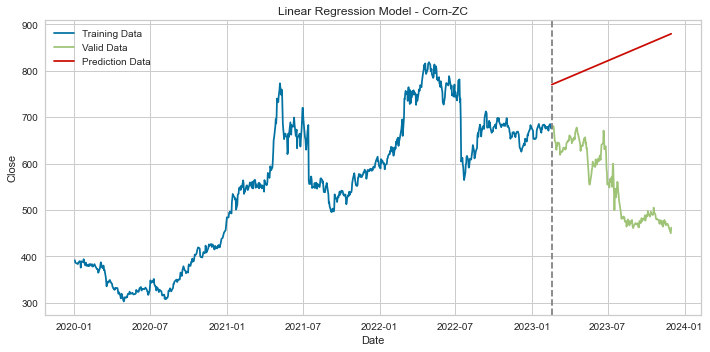

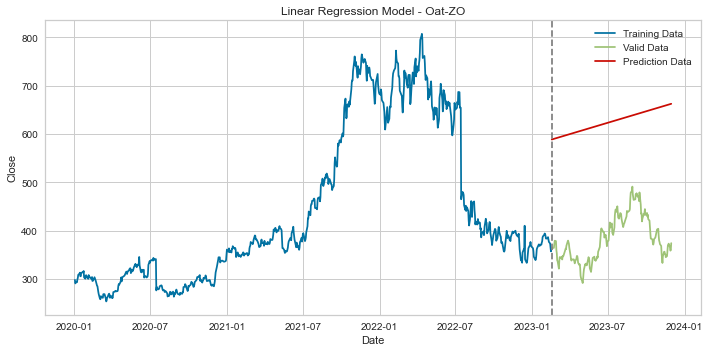

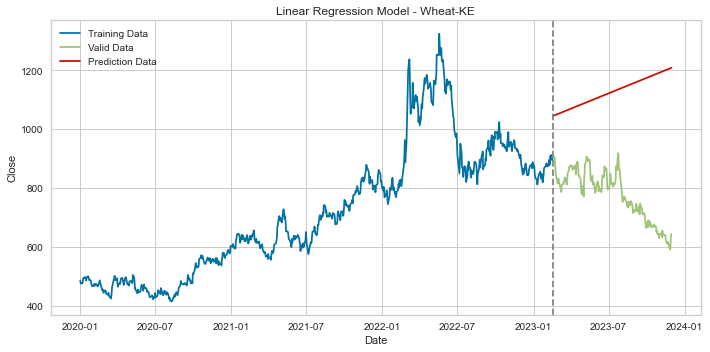

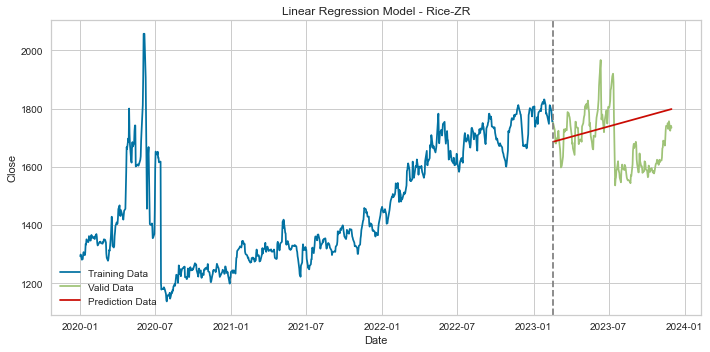

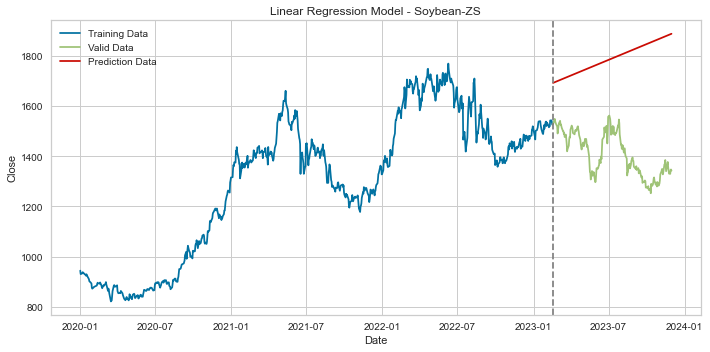

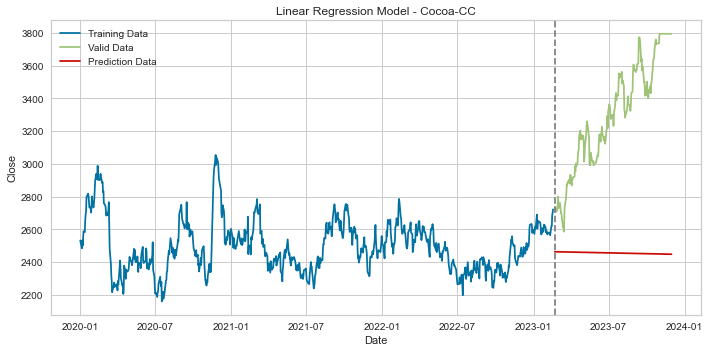

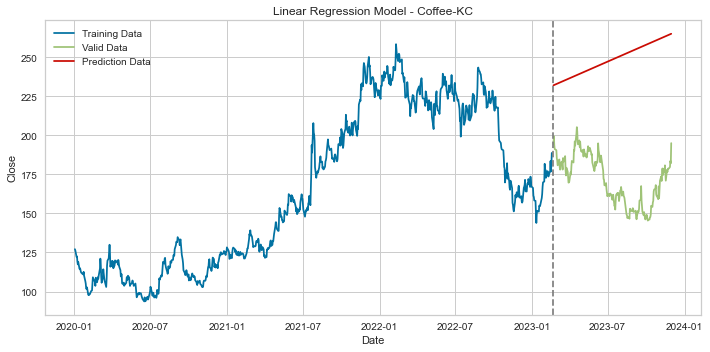

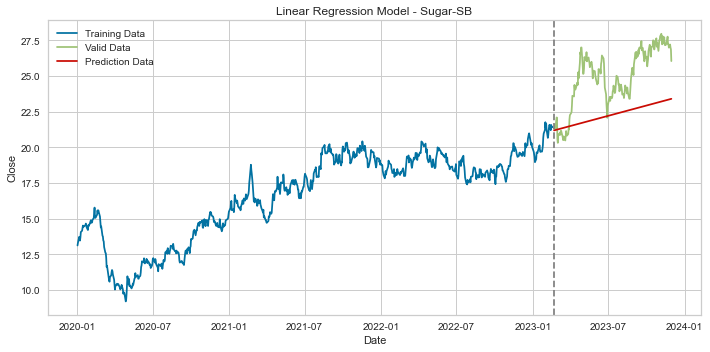

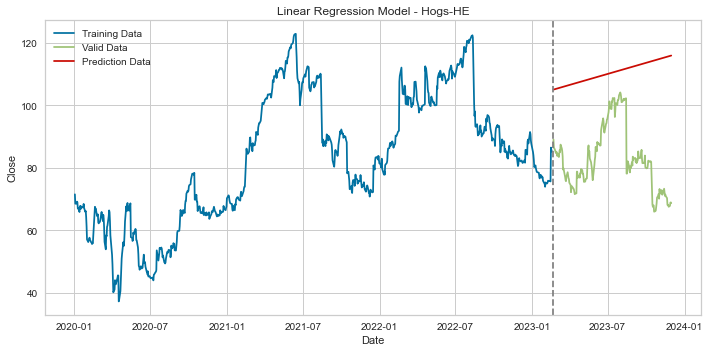

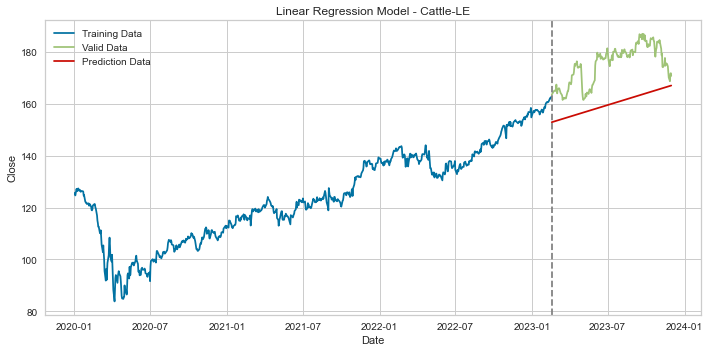

In [37]:
# Perform Linear Regression model across all commodities

results_LR_Model = []# Store the results from each dataframes in a empty list

for df, CommodityName in zip(dataframes, commodities_names):
    LR_Model(df)

#### 3.3.2 Model evaluation: Long Short-Term Memory (LSTM)
Deploy and evaluate the LSTM model across the 10 commodities.

In [38]:
# Define LSTM functions:

def LSTM_Model(data):

    # Apply cleaning functions:
    add_pct_change(data)
    replace_outlier(data)
    replace_fall(data)
    Feature_Creation(data)

    # Training Dataset
    split_date = int(len(data) * 0.8) # Train in 80% of first dates
    train = np.array(data.CloseNor.iloc[ :split_date])
    X_train = []
    y_train = []
    for i in range(60, split_date):
        X_train.append(train[i-60:i])
        y_train.append(train[i])
    X_train, y_train= np.array(X_train), np.array(y_train) # convert the data into array
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshape the data

    # Testing Dataset
    test = np.array(data.CloseNor.iloc[split_date: ]) # Test after split date
    X_test = []
    y_test = data.Close.iloc[split_date+60: ] # normal values from original data
    for i in range(60, len(test)):
        X_test.append(test[i-60:i])
    X_test = np.array(X_test) # convert the data into array
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Reshape the data

    # Create model LSTM
    seq = Sequential() # Initializing the RNN
    seq.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # Adding the first LSTM layer
    seq.add(LSTM(50, return_sequences=False)) # Adding the Second LSTM layer
    seq.add(Dense(25))
    seq.add(Dense(1))
    seq.compile(optimizer='adam', loss='mean_squared_error')# Compile the model
    seq.fit(X_train, y_train, batch_size=32, epochs=10) # Traing the model. Set the epochs=10

    # Get model predicted values
    scaler = MinMaxScaler()
    scaler.fit(data.filter(['Close']).values)
    y_pred = seq.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred) # "inverse scaled values to original values"

    # Calculate the evaluation metrics on the test dataset:
    MAE = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
    MSE = mean_squared_error(y_test, y_pred) # Mean Squared Error
    RMSE = sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred)) # Root Mean Squared Logarithmic Error
    R2 = r2_score(y_test, y_pred) # R-Squared
    # Store metrics in these lists:
    metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
    metrics_values = [MAE, MSE, RMSE, RMSLE, R2]
    for metric, value in zip(metrics_names, metrics_values):
        print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')
    results_LSTM_Model.append(metrics_values)# Store the results from each dataframes in a empty list
    print()

    # Split Close prices into train and valid df
    train_df = pd.DataFrame(data.Close.iloc[ :split_date+60]) 
    valid_df = pd.DataFrame(data.Close.iloc[split_date+60: ]) 
    valid_df['Prediction'] = y_pred # Add Prediction column with the inverse normalized values

    # Plot the datasets 
    fig, ax1 = plt.subplots(figsize=(10,5))
    train_df.plot(ax=ax1, label='Training Data', title=f'LSTM Model - {CommodityName}')
    valid_df.plot(ax=ax1, label=['Valid Data','Prediction Data']).grid(True)
    ax1.axvline(data.index[split_date+60], color='grey', ls='--')
    ax1.legend(['Training Data', 'Valid Data','Prediction Data'])
    plt.tight_layout()

    return

Epoch 1/10
23/23 [==============================] - 9s 89ms/step - loss: 0.0446
Epoch 2/10
23/23 [==============================] - 2s 89ms/step - loss: 0.0046
Epoch 3/10
23/23 [==============================] - 2s 91ms/step - loss: 0.0028
Epoch 4/10
23/23 [==============================] - 2s 90ms/step - loss: 0.0027
Epoch 5/10
23/23 [==============================] - 2s 98ms/step - loss: 0.0027
Epoch 6/10
23/23 [==============================] - 3s 130ms/step - loss: 0.0025
Epoch 7/10
23/23 [==============================] - 3s 130ms/step - loss: 0.0023
Epoch 8/10
23/23 [==============================] - 3s 125ms/step - loss: 0.0024
Epoch 9/10
23/23 [==============================] - 3s 134ms/step - loss: 0.0023
Epoch 10/10
5/5 [==============================] - 2s 44ms/step
 Corn-ZC, MAE: 18.73 
 Corn-ZC, MSE: 701.48 
 Corn-ZC, RMSE: 26.49 
 Corn-ZC, RMSLE: 0.05 
 Corn-ZC, R2: 0.78 

Epoch 1/10
23/23 [==============================] - 10s 133ms/step - loss: 0.0399
Epoch 2/10
23/23 [

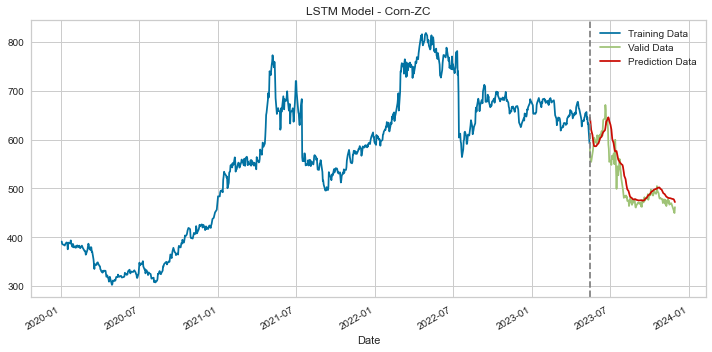

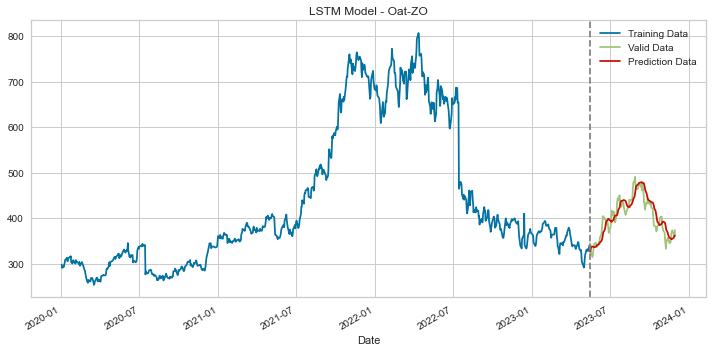

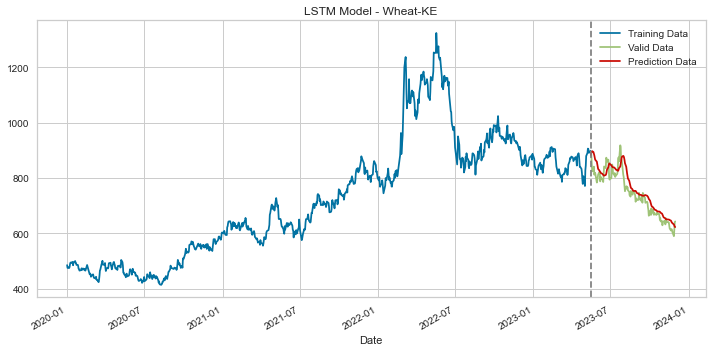

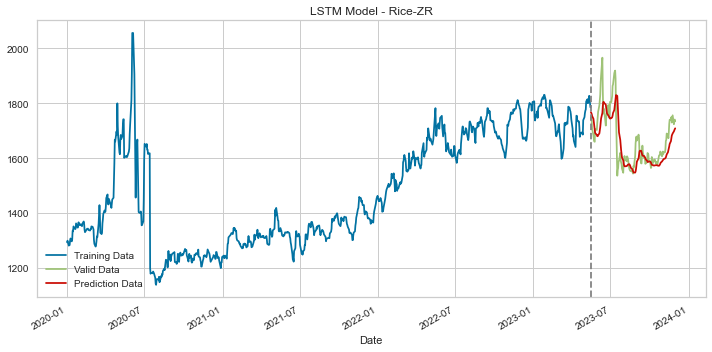

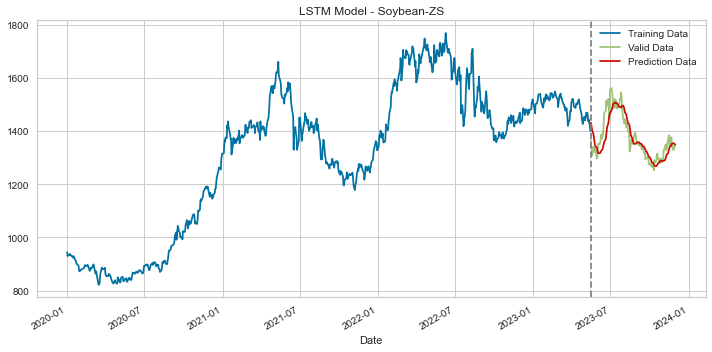

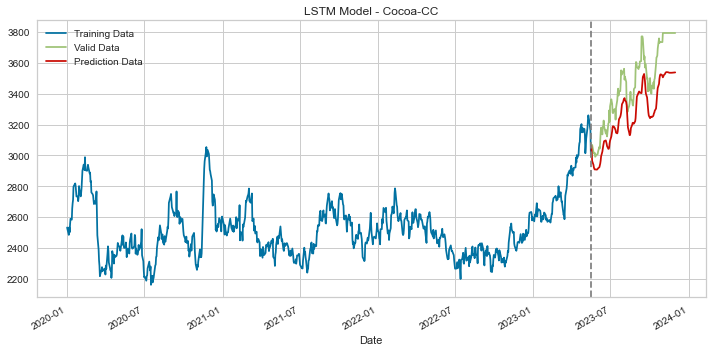

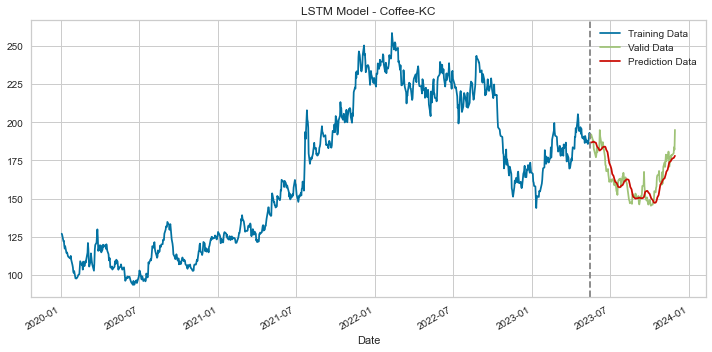

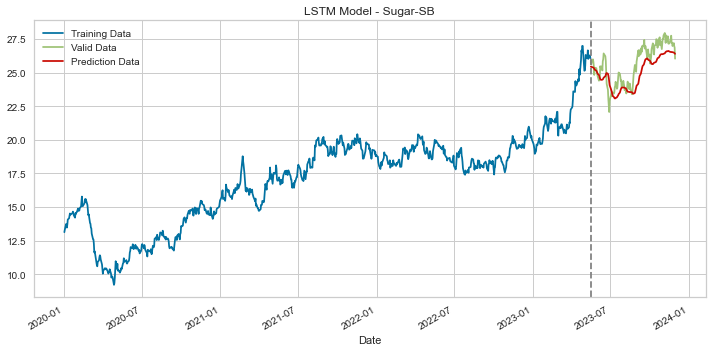

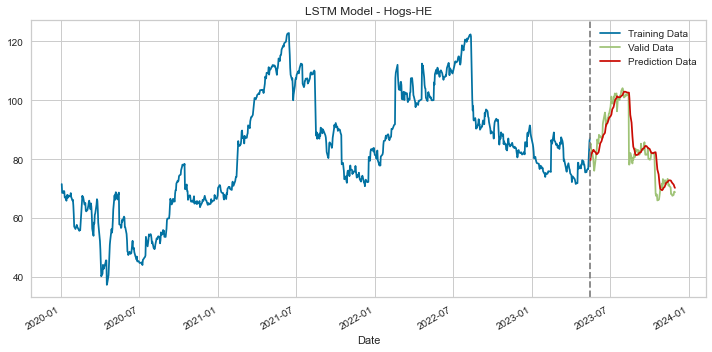

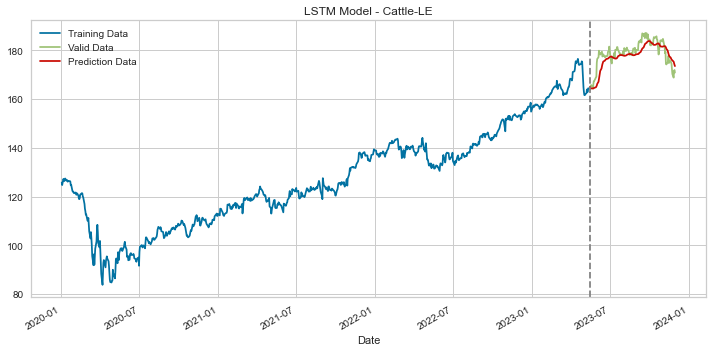

In [39]:
# Perform LSTM model across all commodities

results_LSTM_Model = []# Store the results from each dataframes in a empty list

for df, CommodityName in zip(dataframes, commodities_names):
    LSTM_Model(df)

#### 3.3.3 Model evaluation: Extreme Gradient Boosting XGB Regressor
Deploy and evaluate the Extreme Gradient Boosting XGB Regressor model across the 10 commodities.

In [40]:
# Define XGB functions:

def XGB_Model(data):

    # Apply cleaning functions:
    add_pct_change(data)
    replace_outlier(data)
    replace_fall(data)
    Feature_Creation(data)

    # Training Dataset
    split_date = int(len(data) * 0.8) # Train in 80% of first dates
    train_df = pd.DataFrame(data.Close.iloc[ :split_date])
    test_df = pd.DataFrame(data.Close.iloc[split_date: ]) # Test in 20% after split

    # Split training and test datasets
    X_train = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[ :split_date]
    y_train = data[['Close']].iloc[ :split_date]
    X_test = data[['Open', 'High', 'Low', 'Volume', 'DayOfWeek', 'Month', 'Quarter', 'Year']].iloc[split_date: ]
    y_test = data[['Close']].iloc[split_date: ]

    # Create model XGB Regressor
    xgbreg = xgb.XGBRegressor(n_estimators = 1000, colsample_bytree = 0.3, max_depth = 5, alpha = 10, early_stopping_rounds =50, learning_rate = 0.1)
    # Fit the model to the training data
    xgbreg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

    # Forecast on Test set
    test_df['Prediction'] = xgbreg.predict(X_test) # Add the predictions in a new column
    # Merge the predictions with the initial df
    if any(col in data.columns for col in set(['Prediction', 'Prediction_x', 'Prediction_y'])):
        data.drop(['Prediction','Prediction_x','Prediction_y'], axis=1, inplace=True, errors='ignore')
        data = data.merge(test_df['Prediction'], how='left', left_index=True, right_index=True)
    else:
        data = data.merge(test_df['Prediction'], how='left', left_index=True, right_index=True)

    # Calculate the evaluation metrics on the test dataset:
    MAE = mean_absolute_error(test_df['Close'], test_df['Prediction']) # Mean Absolute Error
    MSE = mean_squared_error(test_df['Close'], test_df['Prediction']) # Mean Squared Error
    RMSE = sqrt(mean_squared_error(test_df['Close'], test_df['Prediction'])) # Root Mean Squared Error
    RMSLE = np.sqrt(mean_squared_log_error(test_df['Close'], test_df['Prediction'])) # Root Mean Squared Logarithmic Error
    R2 = r2_score(test_df['Close'], test_df['Prediction']) # R-Squared
    # Store metrics in these lists:
    metrics_names = ['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']
    metrics_values = [MAE, MSE, RMSE, RMSLE, R2]
    for metric, value in zip(metrics_names, metrics_values):
        print(f'\033[1m {CommodityName}, {metric}: {value:.2f} \033[0m')
    results_XGB_Model.append(metrics_values)# Store the results from each dataframes in a empty list
    print()

    # Visualize Training and Predictions 
    fig, ax1 = plt.subplots(figsize=(10,5))
    data[['Close']].plot(ax=ax1, title=f'XGB Regressor Model - {CommodityName}')
    data[['Prediction']].plot(ax=ax1, style='--', color='orange').grid(True)
    ax1.axvline(data.index[split_date], color='grey', ls='--')
    ax1.legend(['Training Data', 'Prediction Data'])
    plt.tight_layout()

    return

[0]	validation_0-rmse:517.10655	validation_1-rmse:505.57321
[89]	validation_0-rmse:4.60409	validation_1-rmse:14.43627
 Corn-ZC, MAE: 8.63 
 Corn-ZC, MSE: 132.69 
 Corn-ZC, RMSE: 11.52 
 Corn-ZC, RMSLE: 0.02 
 Corn-ZC, R2: 0.98 

[0]	validation_0-rmse:426.73829	validation_1-rmse:342.41010
[100]	validation_0-rmse:4.17132	validation_1-rmse:8.04147
[200]	validation_0-rmse:3.04684	validation_1-rmse:7.53604
[283]	validation_0-rmse:2.67904	validation_1-rmse:7.56172
 Oat-ZO, MAE: 6.12 
 Oat-ZO, MSE: 56.62 
 Oat-ZO, RMSE: 7.52 
 Oat-ZO, RMSLE: 0.02 
 Oat-ZO, R2: 0.97 

[0]	validation_0-rmse:680.25887	validation_1-rmse:708.04630
[100]	validation_0-rmse:7.69158	validation_1-rmse:19.72869
[200]	validation_0-rmse:4.97504	validation_1-rmse:18.43237
[300]	validation_0-rmse:4.07863	validation_1-rmse:18.15854
[400]	validation_0-rmse:3.44020	validation_1-rmse:17.97251
[500]	validation_0-rmse:3.10264	validation_1-rmse:17.84247
[600]	validation_0-rmse:2.84514	validation_1-rmse:17.79390
[700]	validation_0-

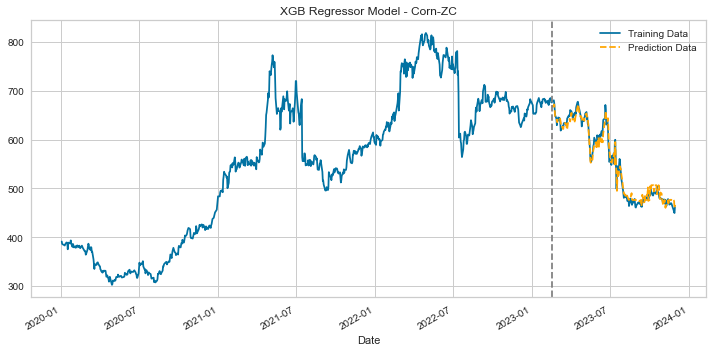

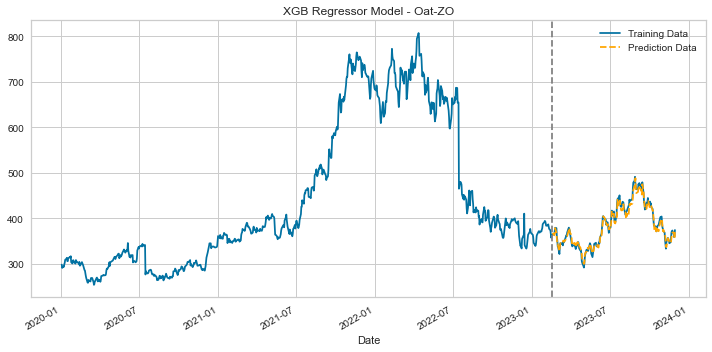

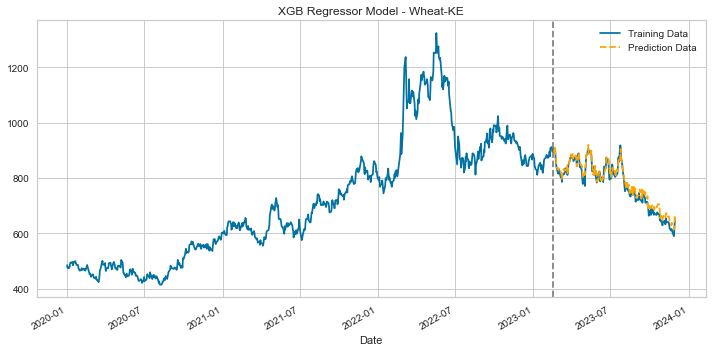

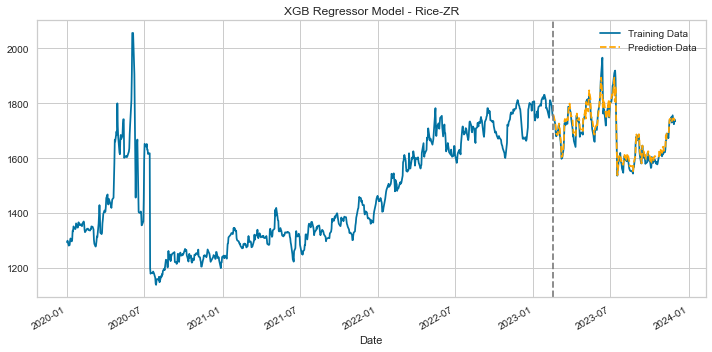

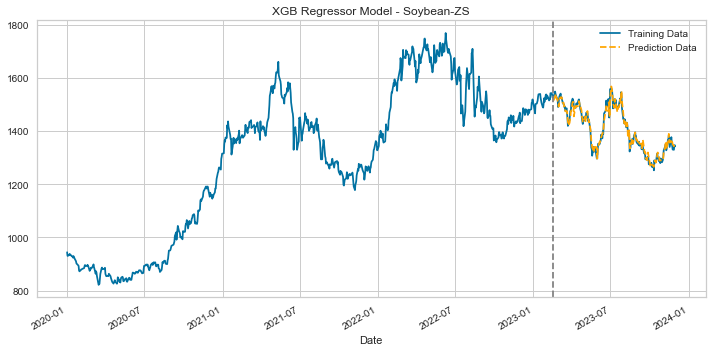

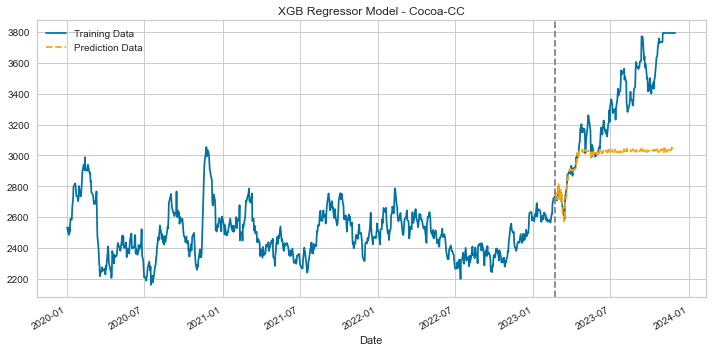

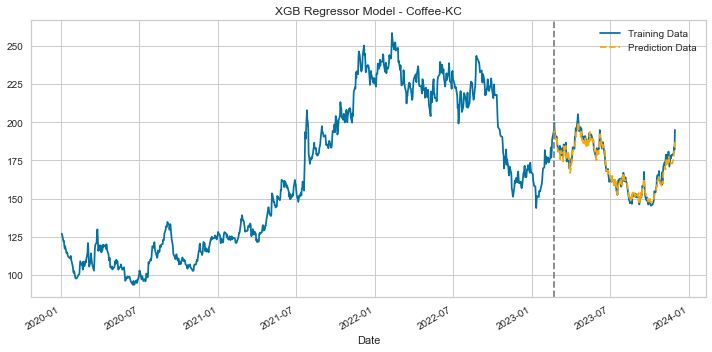

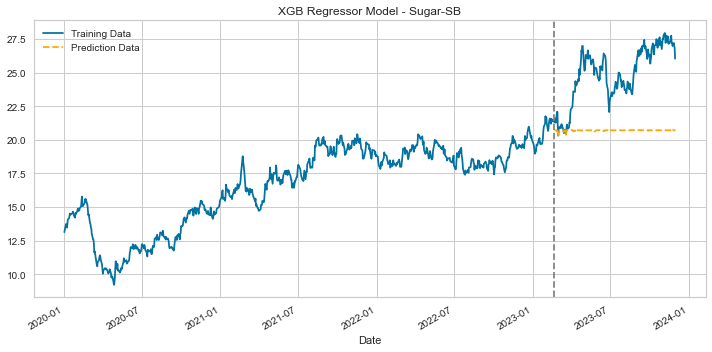

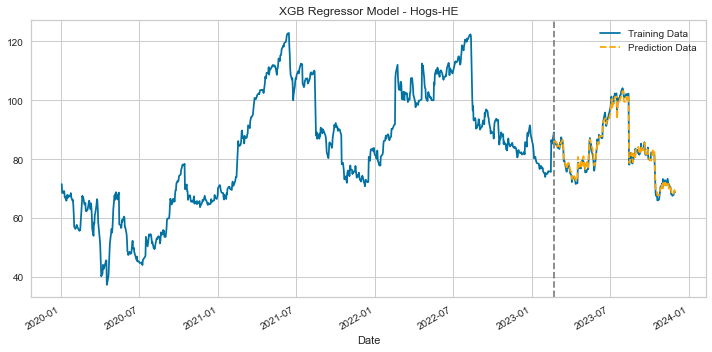

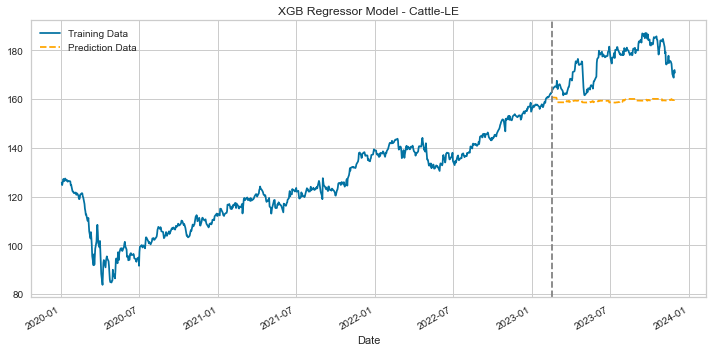

In [41]:
# Perform XGB Regressor model across all commodities

results_XGB_Model = []# Store the results from each dataframes in a empty list

for df, CommodityName in zip(dataframes, commodities_names):
    XGB_Model(df)

### 3.4 Analysis 

#### 3.4.1 Correlation Analysis

In [42]:
# Merge in one dataframe the normalized close prices of each of the 10 commodities:

merged = pd.concat([data['Close'] for data in dataframes], axis=1)
merged.columns = commodities_names

merged

,Corn-ZC,Oat-ZO,Wheat-KE,Rice-ZR,Soybean-ZS,Cocoa-CC,Coffee-KC,Sugar-SB,Hogs-HE,Cattle-LE
Date,,,,,,,,,,
2020-01-02,391.50,298.00,485.25,1293.5,944.25,2532.0,127.099998,13.130000,71.550003,125.775002
2020-01-03,386.50,290.75,475.00,1299.5,930.50,2519.0,126.349998,13.310000,68.550003,124.724998
2020-01-06,384.75,294.25,477.25,1281.5,932.75,2484.0,122.150002,13.730000,68.625000,127.275002
2020-01-07,384.50,293.25,475.00,1283.5,935.00,2533.0,122.400002,13.590000,69.224998,126.525002
2020-01-08,384.25,299.00,480.00,1283.5,938.25,2501.0,119.150002,13.470000,69.025002,126.349998
...,...,...,...,...,...,...,...,...,...,...
2023-11-24,463.25,373.00,602.00,1756.5,1330.75,3794.0,178.649994,26.980000,67.574997,170.250000
2023-11-27,455.50,365.25,590.00,1724.0,1329.75,3794.0,179.699997,27.200001,67.875000,168.774994
2023-11-28,451.50,358.50,613.00,1738.0,1346.50,3794.0,183.649994,26.990000,68.925003,171.649994


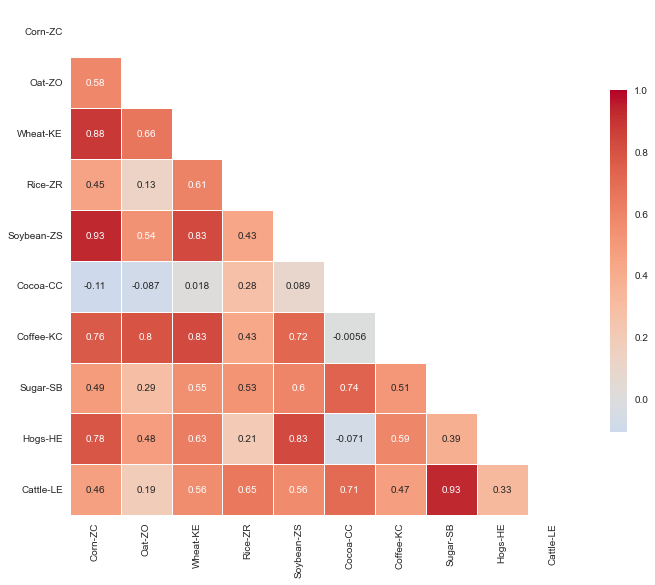

In [43]:
# Compute the correlation matrix:

corr = merged.corr()

# Set up the correlation figure
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))# Generate a mask for the upper triangle
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()


#### 3.4.2 Time series decomposition: 




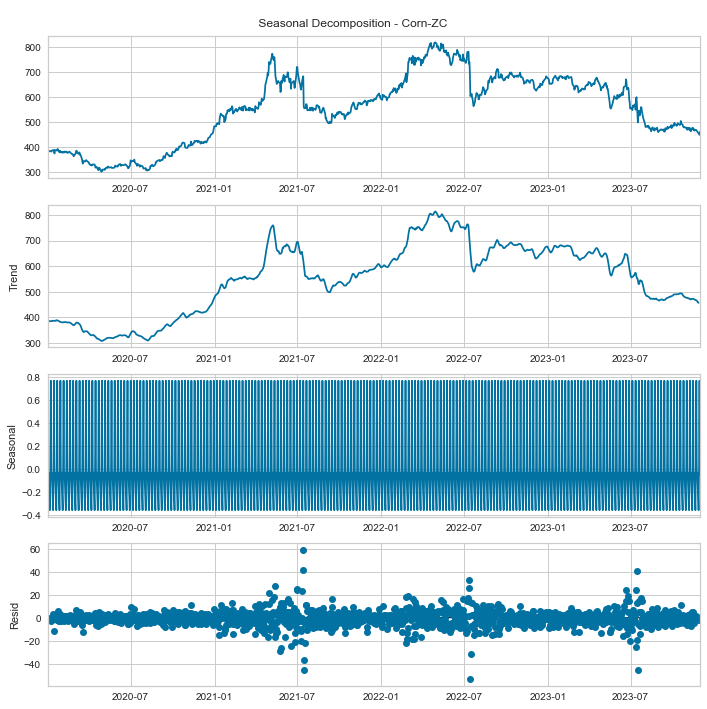

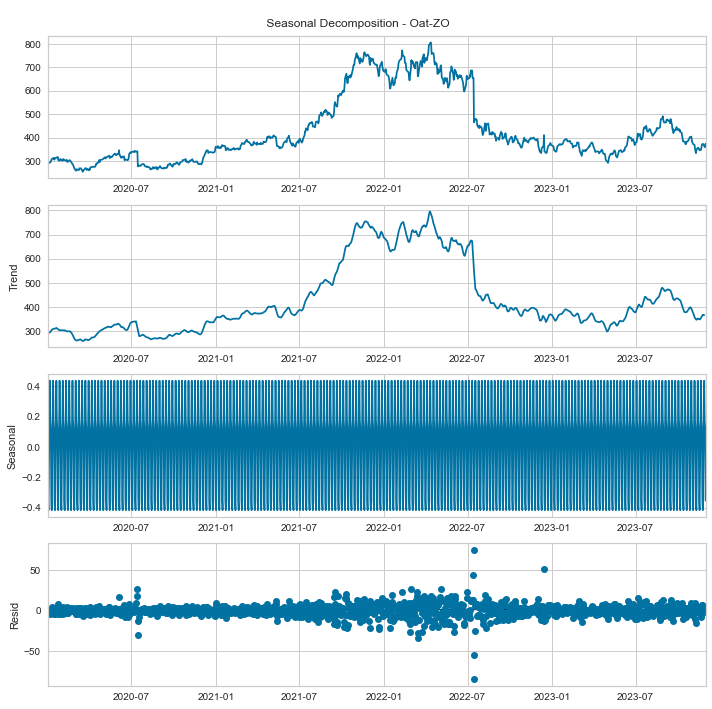

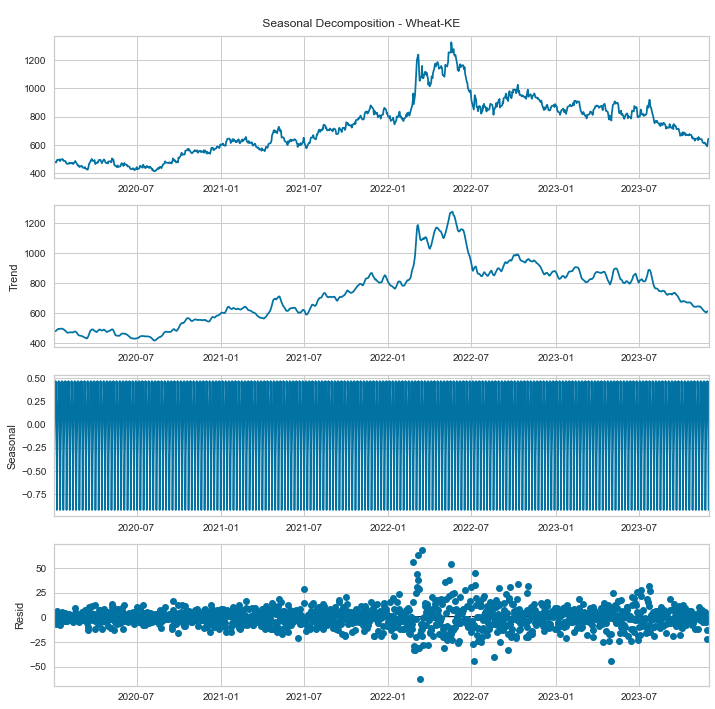

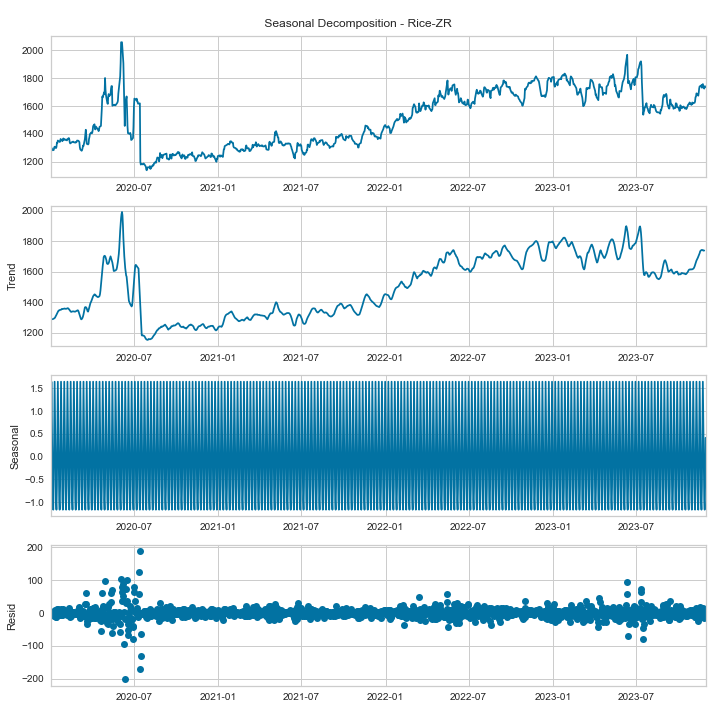

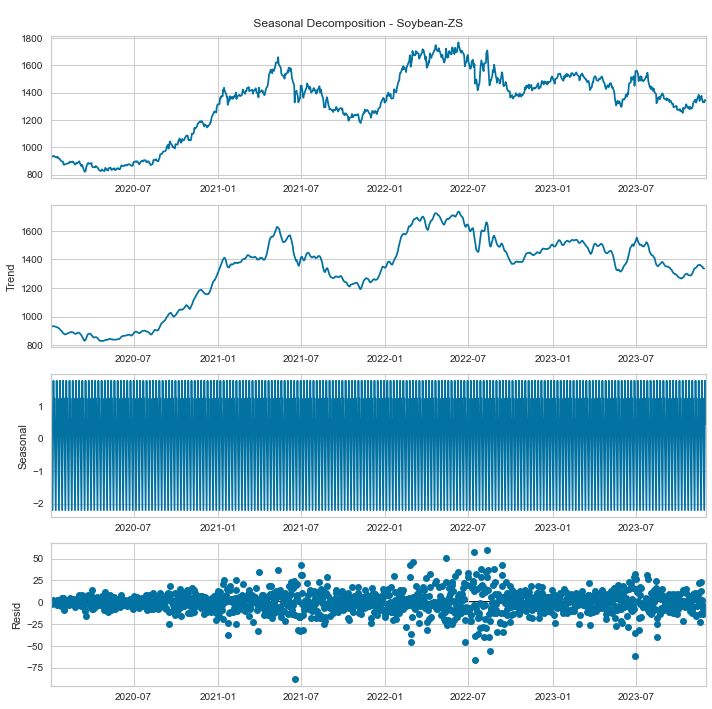

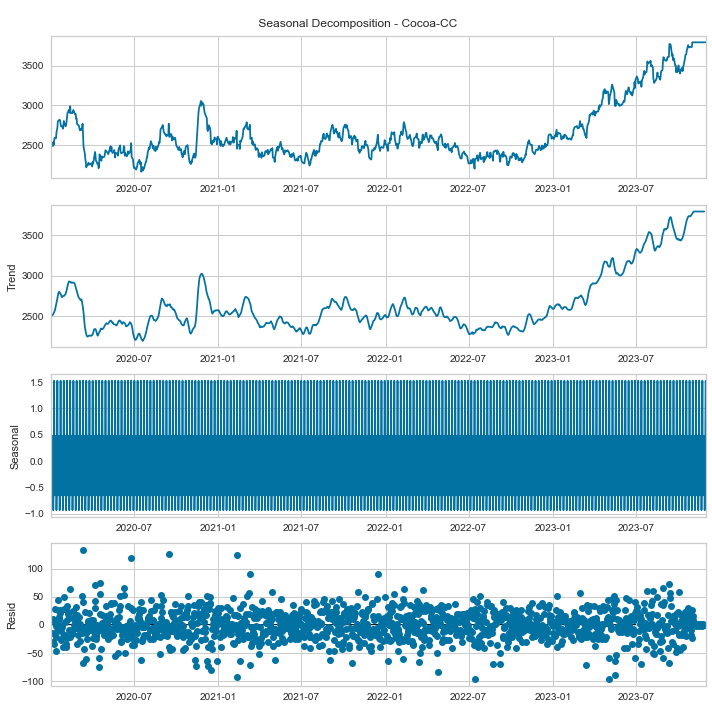

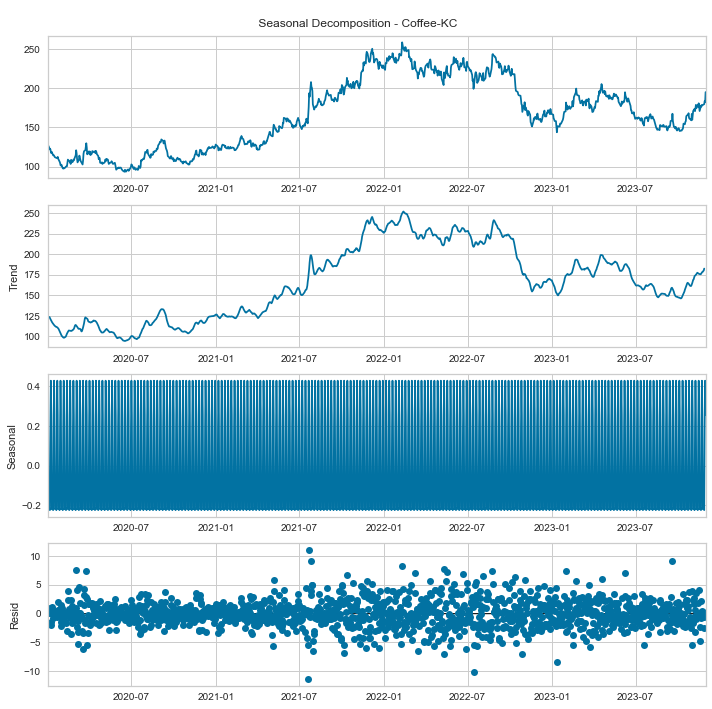

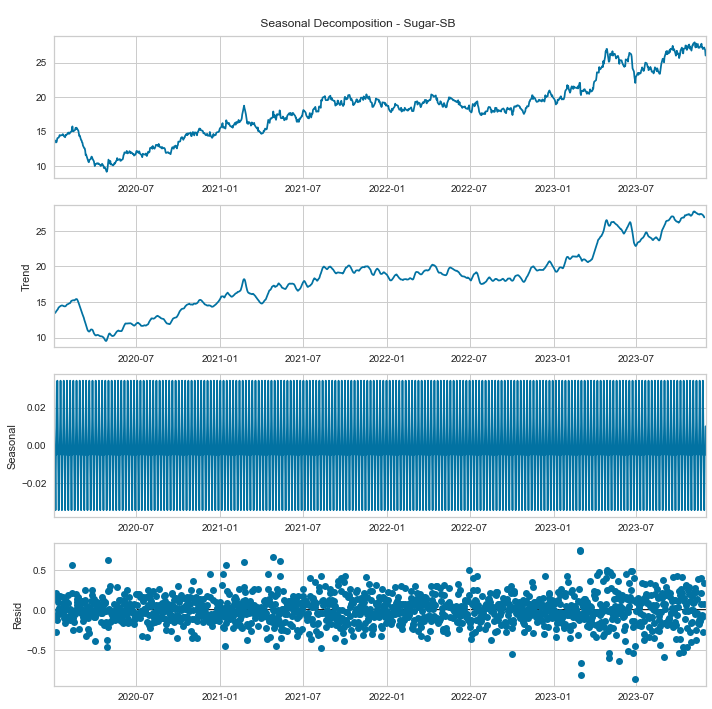

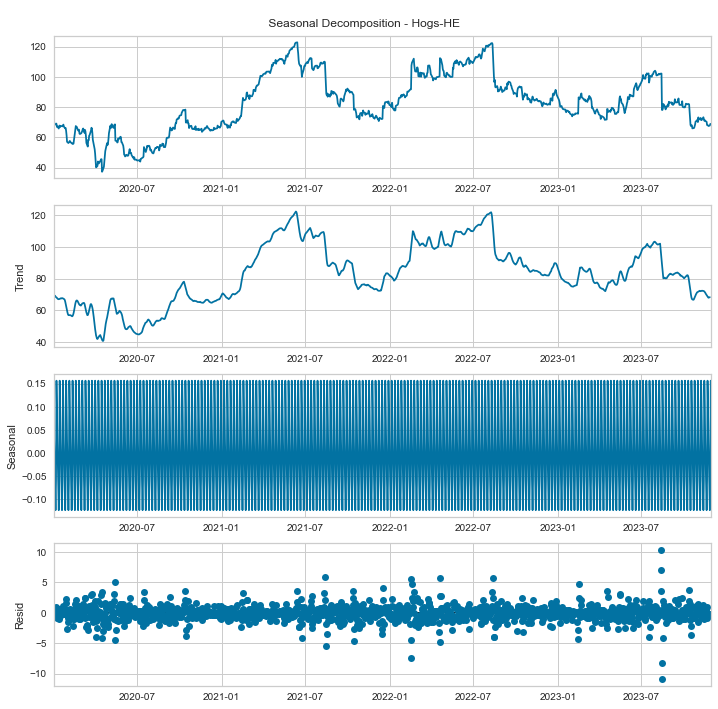

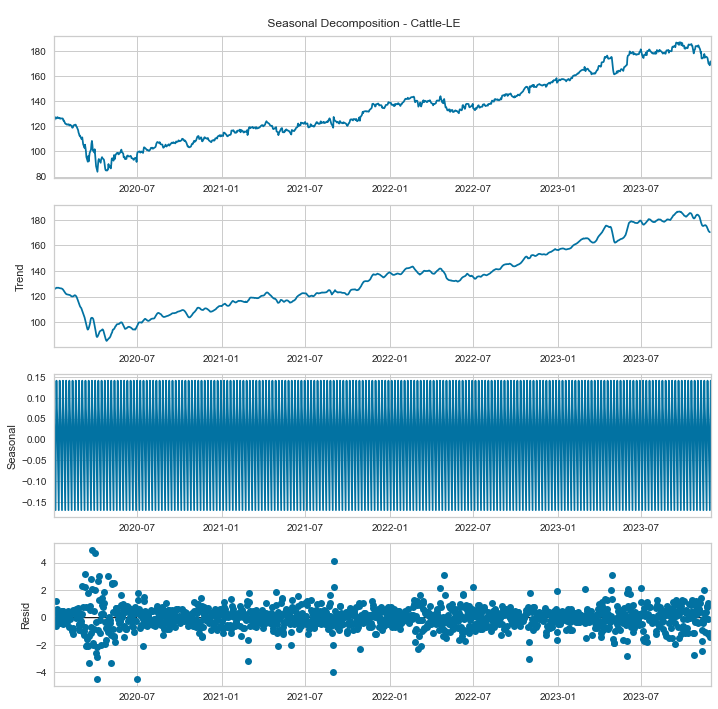

In [44]:
# Generate a plot that will split the time series into trend, seasonality, and residual

for column in merged.columns:
    data_sd = merged[[column]]
    data_sd = data_sd.asfreq('D') # Set the frequency of the time series to daily
    data_sd = data_sd.fillna(data_sd.interpolate())

    # Perform seasonal decomposition
    decompose = seasonal_decompose(data_sd)
    fig = decompose.plot()
    fig.suptitle(f'\n Seasonal Decomposition - {column}')
    fig.set_size_inches(10, 10)
    plt.tight_layout()

#### 3.4.3 Evaluation Metrics Analysis

Selecting the best model will be the one with the best (lowest) metrics.
Analysis will be summarized on the written report.

In [45]:
# Convert the LR model's results to a DataFrame:

results_LR_df = pd.DataFrame(results_LR_Model, columns=['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']).round(2)
results_LR_df.insert(0, 'Commodity', commodities_names)
results_LR_df

,Commodity,MAE,MSE,RMSE,RMSLE,R2
0,Corn-ZC,269.71,84022.18,289.87,0.44,-13.36
1,Oat-ZO,241.89,60118.77,245.19,0.51,-27.24
2,Wheat-KE,352.39,140294.60,374.56,0.41,-18.90
3,Rice-ZR,103.56,15272.83,123.58,0.07,-0.83
4,Soybean-ZS,382.45,163840.48,404.77,0.26,-21.22
5,Cocoa-CC,840.79,822008.96,906.65,0.31,-6.33
6,Coffee-KC,77.33,6504.10,80.65,0.39,-25.55
7,Sugar-SB,2.70,9.34,3.06,0.12,-1.19
8,Hogs-HE,27.62,886.02,29.77,0.32,-7.79
9,Cattle-LE,15.18,257.85,16.06,0.09,-3.63


In [46]:
# Convert the LSTM model's results to a DataFrame:

results_LSTM_df = pd.DataFrame(results_LSTM_Model, columns=['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']).round(2)
results_LSTM_df.insert(0, 'Commodity', commodities_names)
results_LSTM_df

,Commodity,MAE,MSE,RMSE,RMSLE,R2
0,Corn-ZC,18.73,701.48,26.49,0.05,0.78
1,Oat-ZO,15.52,380.74,19.51,0.05,0.79
2,Wheat-KE,28.42,1262.62,35.53,0.05,0.81
3,Rice-ZR,48.38,4590.83,67.76,0.04,0.53
4,Soybean-ZS,31.29,1715.39,41.42,0.03,0.73
5,Cocoa-CC,184.42,39384.42,198.46,0.06,0.35
6,Coffee-KC,5.41,45.69,6.76,0.04,0.74
7,Sugar-SB,0.84,1.05,1.02,0.04,0.51
8,Hogs-HE,3.17,26.69,5.17,0.06,0.79
9,Cattle-LE,2.69,12.44,3.53,0.02,0.54


In [47]:
# Convert the XGB model's results to a DataFrame:

results_XGB_df = pd.DataFrame(results_XGB_Model, columns=['MAE', 'MSE', 'RMSE', 'RMSLE', 'R2']).round(2)
results_XGB_df.insert(0, 'Commodity', commodities_names)
results_XGB_df

,Commodity,MAE,MSE,RMSE,RMSLE,R2
0,Corn-ZC,8.63,132.69,11.52,0.02,0.98
1,Oat-ZO,6.12,56.62,7.52,0.02,0.97
2,Wheat-KE,14.50,312.34,17.67,0.02,0.96
3,Rice-ZR,15.58,526.59,22.95,0.01,0.94
4,Soybean-ZS,10.62,192.07,13.86,0.01,0.97
5,Cocoa-CC,315.23,169936.98,412.23,0.12,-0.51
6,Coffee-KC,2.29,8.24,2.87,0.02,0.97
7,Sugar-SB,4.18,21.68,4.66,0.19,-4.08
8,Hogs-HE,1.02,1.57,1.25,0.02,0.98
9,Cattle-LE,15.95,306.92,17.52,0.10,-4.51


<a id="References"></a>
### References:

1. Multiple linear regression: theory and applications. Towardsdatascience. https://towardsdatascience.com/multiple-linear-regression-theory-and-applications-677ec2cd04ac <a id='3'></a>
2. Joos Korstanje. July, 2023. How to Select a Model For Your Time Series Prediction Task [Guide]. https://neptune.ai/blog/select-model-for-time-series-prediction-task
3. Applications of decision trees. SpringerLink. https://link.springer.com/chapter/10.1007/978-981-15-1706-8_9.
 

In [48]:
# Print the time of execution of entire code string

time_end = datetime.now() 
print(f'Time of execution: {time_end - time_start}')

Time of execution: 0:10:11.255751
